In [25]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_517c4add7ff840f8915f46a7a0f89295 = 'https://s3.ap.cloud-object-storage.appdomain.cloud'
else:
    endpoint_517c4add7ff840f8915f46a7a0f89295 = 'https://s3.private.ap.cloud-object-storage.appdomain.cloud'

client_517c4add7ff840f8915f46a7a0f89295 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jrUiIrk68Cc8AeuNY0kkYbwC-HP2b_RQ2y905E3I6Wvu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_517c4add7ff840f8915f46a7a0f89295)

body = client_517c4add7ff840f8915f46a7a0f89295.get_object(Bucket='pythonprojectfordatascience-donotdelete-pr-i4fyreja3rirtd',Key='Sacramentorealestatetransactions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [26]:
df_data_1.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [4]:
df_data_1.isnull().sum()
# as we can see it's clean data without null values

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [35]:
# we are going to import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier, perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [14]:
print(df_data_1['city'])

0           SACRAMENTO
1           SACRAMENTO
2           SACRAMENTO
3           SACRAMENTO
4           SACRAMENTO
            ...       
980         SACRAMENTO
981         SACRAMENTO
982     CITRUS HEIGHTS
983          ELK GROVE
984    EL DORADO HILLS
Name: city, Length: 985, dtype: object


In [20]:
pd.DataFrame({'city':df_data_1['city'].unique()})
# here is the index number of each city

,city
0,SACRAMENTO
1,RANCHO CORDOVA
2,RIO LINDA
3,CITRUS HEIGHTS
4,NORTH HIGHLANDS
5,ANTELOPE
6,ELK GROVE
7,ELVERTA
8,GALT
9,CARMICHAEL


In [28]:
#now we are going to convert city into number
from sklearn.preprocessing import LabelEncoder
df_data_1['city'] = LabelEncoder().fit_transform(df_data_1['city'])

In [29]:
df_data_1
# Here is the newest dataset that we have convert city string into index number
# and we are going to do the same thing with type

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,33,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,33,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,33,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,33,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,33,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,33,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,33,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,4,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,9,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [31]:
pd.DataFrame({'type':df_data_1['type'].unique()})
# we get the index number of type

,type
0,Residential
1,Condo
2,Multi-Family
3,Unkown


In [32]:
# now we are going to convert the sring type of resident into the index number
df_data_1['type'] = LabelEncoder().fit_transform(df_data_1['type'])

In [33]:
df_data_1
#here is the newest dataset  

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,33,95838,CA,2,1,836,2,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,33,95823,CA,3,1,1167,2,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,33,95815,CA,2,1,796,2,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,33,95815,CA,2,1,852,2,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,33,95824,CA,2,1,797,2,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,33,95829,CA,4,3,2280,2,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,33,95823,CA,3,2,1477,2,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,4,95610,CA,3,2,1216,2,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,9,95758,CA,4,2,1685,2,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [34]:
# now we are going to retrieve the training data and the test data
# in this case i will make the 'type' as the result
x = df_data_1[['city','beds','baths']]
y = df_data_1[['type']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 10)

In [36]:
# so now we are going to test all of the ML
BG = BaggingClassifier()

In [37]:
BG.fit(x_train, y_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier()

In [39]:
bgp = BG.predict(x_test)

In [42]:
accuracybgp = accuracy_score(bgp, y_test)
accuracybgp
#bagging classifier has the good accuracy

0.9292929292929293

In [46]:
cfm = confusion_matrix(y_test, bgp)
cfm

array([[ 2,  0,  2],
       [ 0,  0,  2],
       [ 2,  1, 90]])

<AxesSubplot:>

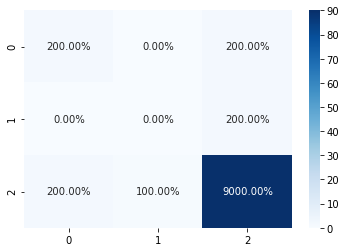

In [52]:
sns.heatmap(cfm/np.sum(cfm), cmap = 'Blues', annot = True, cbar = True, fmt = )